In [17]:
# This is Import/Connection/Loading
import mariadb
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Connect to the database
db = mariadb.connect(
    host="127.0.0.1",
    port=3306,
    user="fsnap",
    password="rosco",
    database="data"
)

# Function to load tables into DataFrames
def load_table_dataframe(table_name, conn):
    query = f"SELECT * FROM {table_name};"
    dataframe = pd.read_sql(query, conn)
    return dataframe

# Load tables into DataFrames
department_df = load_table_dataframe("Department", db)
students_df = load_table_dataframe("Students", db)
performance_df = load_table_dataframe("Performance", db)

# Display head of performance data to verify data
print("Student Performance:")
print(performance_df.head())


/var/folders/g7/vq28k0zn3tl8zbf_zxqmkyvc0000gn/T/ipykernel_58359/344860131.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe = pd.read_sql(query, conn)


Student Performance:
    Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
0  SID20131143        Sem_1  SEMI0012995    Paper 1     44             5
1  SID20131143        Sem_1  SEMI0014130    Paper 7     90            11
2  SID20131143        Sem_1  SEMI0015183    Paper 2     74             8
3  SID20131143        Sem_1  SEMI0015910    Paper 4     44             5
4  SID20131143        Sem_1  SEMI0016208    Paper 5     95            12


In [18]:
#Step 1: Defining the student IDs and initalizing an empty list to store predictions.
student_ids = ['SID20131151', 'SID20149500', 'SID20182516']
predictions = []

This step initalizes the list of student IDs we are interested in and an empty list where we will save predictions

In [19]:
#Step 2: Loop through each student and train a linear regression model on their data
for student_id in student_ids:
    #Filtering data for the specific students
    student_data = performance_df[performance_df['Student_ID'] == student_id]

    #checking to see if theres enough data to train the model aka more then 1 entry
    if len(student_data) > 1:
        #defining features (Effort_Hours) and target (marks) for model
        x = student_data[['Effort_Hours']]
        y = student_data['Marks']

        # Initialize and train the linear regression model
        model = LinearRegression()
        model.fit(x, y)

        #For each Student, we initialize and train a new linear regression model on that students specific data
        #This model allows us to make a personalized prediction based on each students effort hours

        #Step 3: predicting the scores for a 10-hour effort
        predicted_score = model.predict(np.array([[10]]))[0]
        
        #retrieving department information for the student
        department_info = students_df[students_df['Student_ID'] == student_id]['Department_Admission'].values[0]

        #Append prediction results to the list
        predictions.append({
            'Student_ID': student_id,
            'Predicted Score for 10hr Effort': round(predicted_score, 2),
            'Department': department_info
        })

        print(f"Processed Student ID: {student_id}")

        #After training, we can predict the score for a 10-hour effort specific to each student.
        #We also retrieve and record the student's department information for display.


    else:
        print(f"Not enough data to train model for Student ID: {student_id}")

Processed Student ID: SID20131151
Processed Student ID: SID20149500
Processed Student ID: SID20182516


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


For each student ID, we want to filter the performance data to isolate the records for the specific students. 
This ensures that we are only analyzing the individual student data for our predictions.

In [20]:
#Step 4: Converting predictions list to DataFrame for easier display to user
predictions_df = pd.DataFrame(predictions)
print("\nPredicted Scores for 10 Hours of Effort:")
print(predictions_df)

#Display the predictions in a structured DataFrame, showing predicted scores for each student based on 10 hours of effort.



Predicted Scores for 10 Hours of Effort:
    Student_ID  Predicted Score for 10hr Effort Department
0  SID20131151                            81.92  IDEPT6347
1  SID20149500                            82.25  IDEPT4308
2  SID20182516                            82.17  IDEPT3062


/var/folders/g7/vq28k0zn3tl8zbf_zxqmkyvc0000gn/T/ipykernel_58359/582519987.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


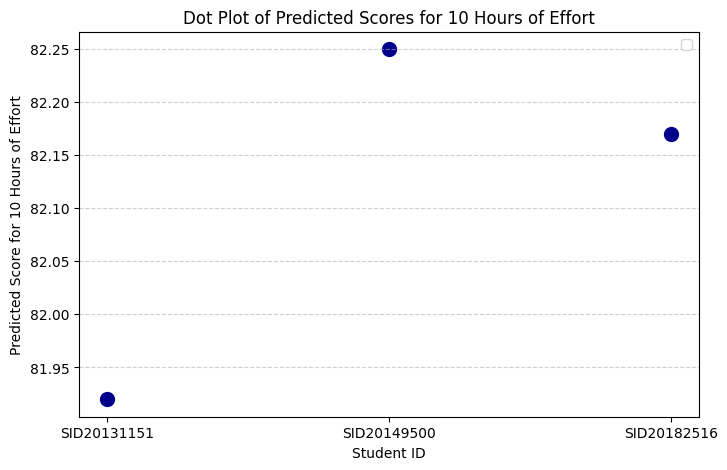

In [21]:
import matplotlib.pyplot as plt

# Plotting dot plot with reference line
plt.figure(figsize=(8, 5))
plt.scatter(predictions_df['Student_ID'], predictions_df['Predicted Score for 10hr Effort'], color='darkblue', s=100)
plt.xlabel("Student ID")
plt.ylabel("Predicted Score for 10 Hours of Effort")
plt.title("Dot Plot of Predicted Scores for 10 Hours of Effort")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


This dot plot is a simple yet effective method for showing the individual scores. 